In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
from matplotlib.colors import LogNorm
# import cv2

data = np.load('difpad.npy')

N = 1200
A = 900
data = data[A:-N,A:-N]
data += 1
print(data.shape)

# plt.imshow(data,norm=LogNorm())
# plt.show()


cx, cy = 50,50

data = np.pad(data,[[cy,cy],[cx,cx]],mode='constant')
data = np.roll(data,(-cy,-cx))

sum_matrix = np.zeros_like(data)

for theta in range(0,360,1):
    if theta%50==0: print(theta)
    sum_matrix += np.roll(rotate(data,theta,reshape=False),(cy,cx))


sum_matrix = sum_matrix[cy:-cy,cx:-cx]
data = data[cy:-cy,cx:-cx]

(972, 972)
0
50
100
150
200
250
300
350


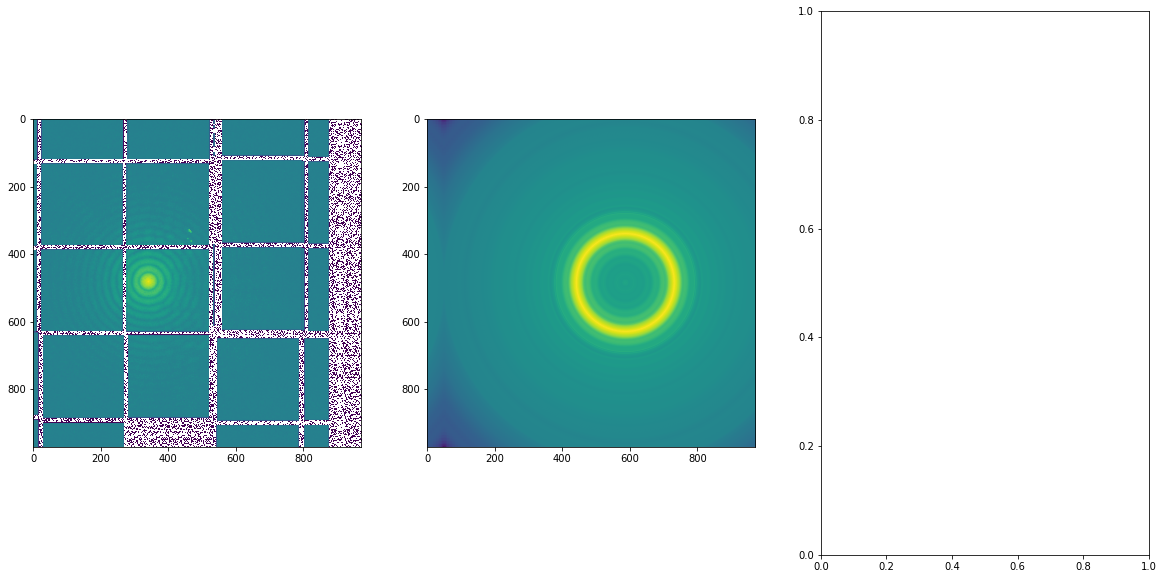

In [2]:
# circle = np.where(sum_matrix > 3*np.mean(sum_matrix),1,0)

# circles = cv2.HoughCircles(circle, cv2.HOUGH_GRADIENT, 1.2, 100)


fig, ax = plt.subplots(1,3,figsize=(20,10))
ax[0].imshow(data,norm=LogNorm())
ax[1].imshow(sum_matrix,norm=LogNorm())
# ax[2].imshow(circle)
# ax[3].imshow(circles)


In [3]:
# source = sum_matrix

# #--- ensure image is of the type float ---
# img = source.astype(np.float32)
 
# #--- the following holds the square root of the sum of squares of the image dimensions ---
# #--- this is done so that the entire width/height of the original image is used to express the complete circular range of the resulting polar image ---
# value = np.sqrt(((img.shape[0]/2.0)**2.0)+((img.shape[1]/2.0)**2.0))
 
# polar_image = cv2.linearPolar(img,(img.shape[0]/2, img.shape[1]/2), value, cv2.WARP_FILL_OUTLIERS)
 
# polar_image = polar_image.astype(np.uint8)
# cv2.imshow("Polar Image", polar_image)

# cv2.waitKey(0)
# cv2.destroyAllWindows()